In [1]:
import re
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
data=pd.read_csv("CAPTAINSHOWS.csv")

In [4]:
data

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


In [5]:
data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   object 
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


In [7]:
data['Rotten Tomatoes'] = data['Rotten Tomatoes'].str.rstrip('%').astype('float')

In [8]:
data["Age"] = data["Age"].str.replace("+","")

C:\Users\USER\AppData\Local\Temp\ipykernel_8380\1090521936.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Age"] = data["Age"].str.replace("+","")


In [9]:
data['Age'] = pd.to_numeric(data['Age'],errors='coerce')

In [10]:
data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18.0,9.5,96.0,1,0,0,0,1
1,1,Stranger Things,2016,16.0,8.8,93.0,1,0,0,0,1
2,2,Money Heist,2017,18.0,8.4,91.0,1,0,0,0,1
3,3,Sherlock,2010,16.0,9.1,78.0,1,0,0,0,1
4,4,Better Call Saul,2015,18.0,8.7,97.0,1,0,0,0,1


In [41]:
data["Age"].value_counts()

16.0    1018
7.0      848
18.0     750
13.0       4
Name: Age, dtype: int64

In [42]:
titles=data["Title"].values

In [43]:
text=' '.join(titles)

In [44]:
len(text)

100723

In [45]:
text[1000:1500]

"er Love, Death & Robots Marvel's Jessica Jones New Girl The Good Wife The Umbrella Academy Marvel's The Punisher Ash vs Evil Dead Master of None Bodyguard Schitt's Creek Narcos: Mexico The West Wing Bates Motel Atypical Once Upon a Time Gomorrah Making a Murderer Death Note Castlevania Riverdale Burn Notice Fauda Russian Doll Our Planet Big Mouth American Horror Story Gotham I Am Not Okay with This Criminal Minds The Vietnam War Waco Star Trek The OA Outer Banks The Midnight Gospel Good Girls Ch"

# Analysis of Numeric Data
#First, we plot the year of production of the TV Shows. This gives us an idea of the general timelines.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year'>

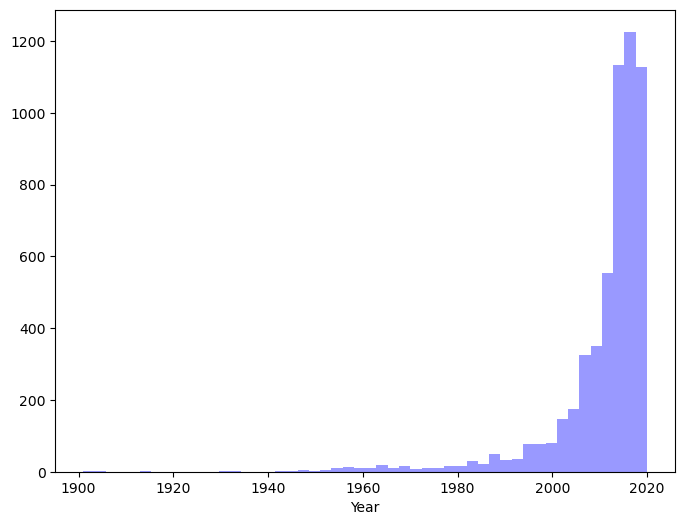

In [52]:
#overall year of release analysis
plt.subplots(figsize=(8,6))
sns.distplot(data["Year"],kde=False, color="blue")

# IMDB Rating Data

In [53]:
print("TV Shows with highest IMDb ratings are= ")
print((data.sort_values("IMDb",ascending=False).head(20))['Title'])

TV Shows with highest IMDb ratings are= 
3023                             Destiny
0                           Breaking Bad
3747                        Malgudi Days
3177                        Hungry Henry
3567                    Band of Brothers
2365                 The Joy of Painting
4128                      Green Paradise
91                            Our Planet
3566                            The Wire
325                              Ramayan
1931                      Rick and Morty
4041                     Everyday Driver
3701                            Baseball
282                      Yeh Meri Family
3798                             The Bay
4257                  Single and Anxious
3568                        The Sopranos
4029             Harmony with A R Rahman
9             Avatar: The Last Airbender
15      Fullmetal Alchemist: Brotherhood
Name: Title, dtype: object


# Now, the top 20 shows with the best ratings.

<AxesSubplot:xlabel='IMDb', ylabel='Title'>

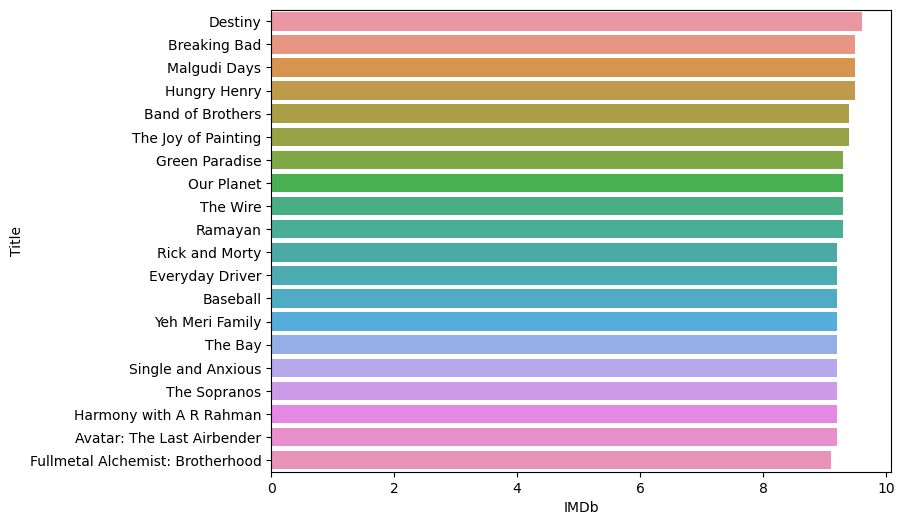

In [54]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="IMDb", y="Title" , data= data.sort_values("IMDb",ascending=False).head(20))

# Now, the TV shows with the worst ratings.

<AxesSubplot:xlabel='IMDb', ylabel='Title'>

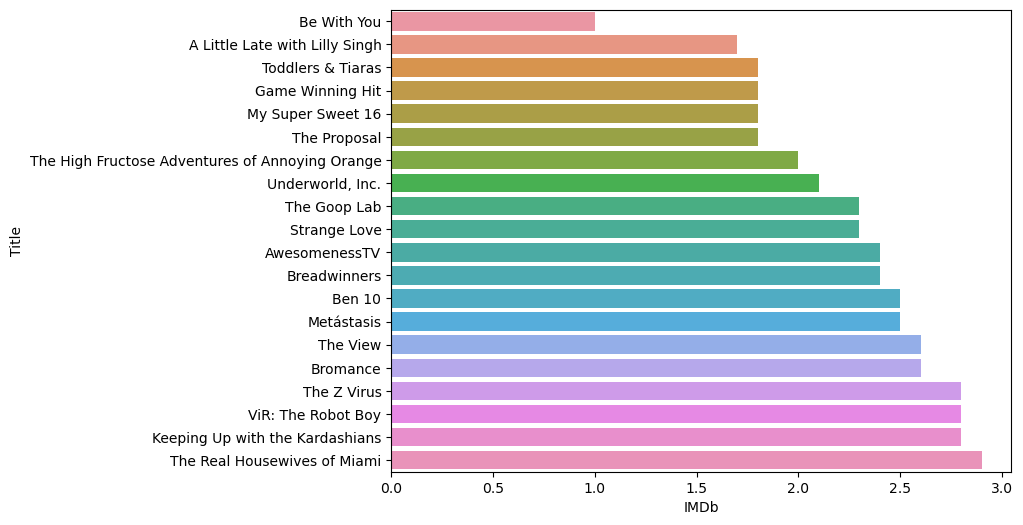

In [56]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="IMDb", y="Title" , data= data.sort_values("IMDb",ascending=True).head(20))

# Well, these are some of the worst-rated TV Shows.

Let us look at the overall IMDB rating data. Having a look at the overall data will show the data distribution.

Text(0.5, 1.0, 'IMDb Rating Distribution')

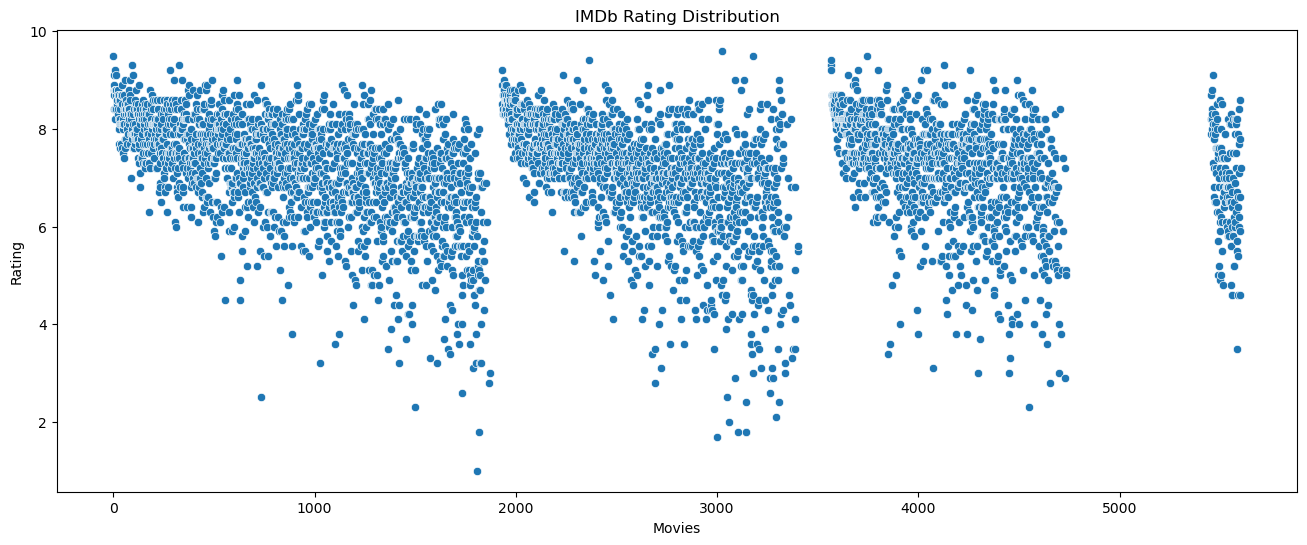

In [57]:
#Overall data of IMDb ratings
plt.figure(figsize=(16, 6))
sns.scatterplot(data=data['IMDb'])
plt.ylabel("Rating")
plt.xlabel('Movies')
plt.title("IMDb Rating Distribution")

# Rotten Tomatoes Scores
Now, we proceed with the Rotten Tomatoes scores.

<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='Title'>

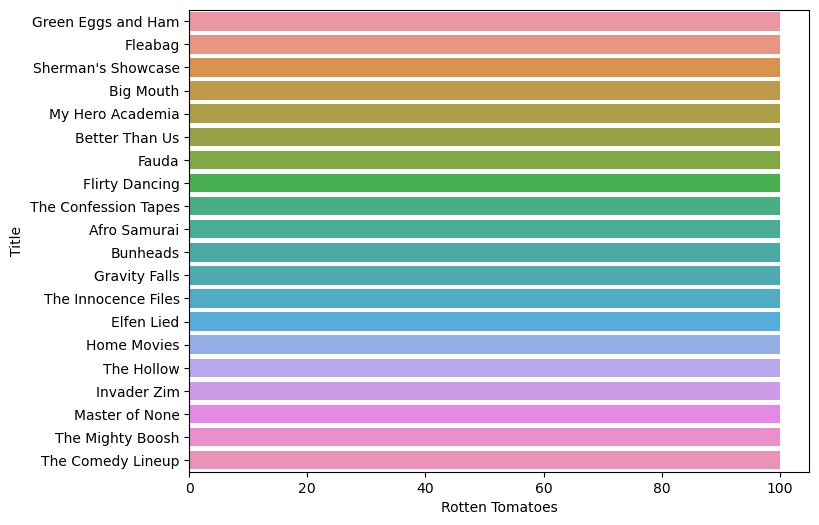

In [58]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="Rotten Tomatoes", y="Title" , data= data.sort_values("Rotten Tomatoes",ascending=False).head(20))

# Now, a look at the worst scores.

<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='Title'>

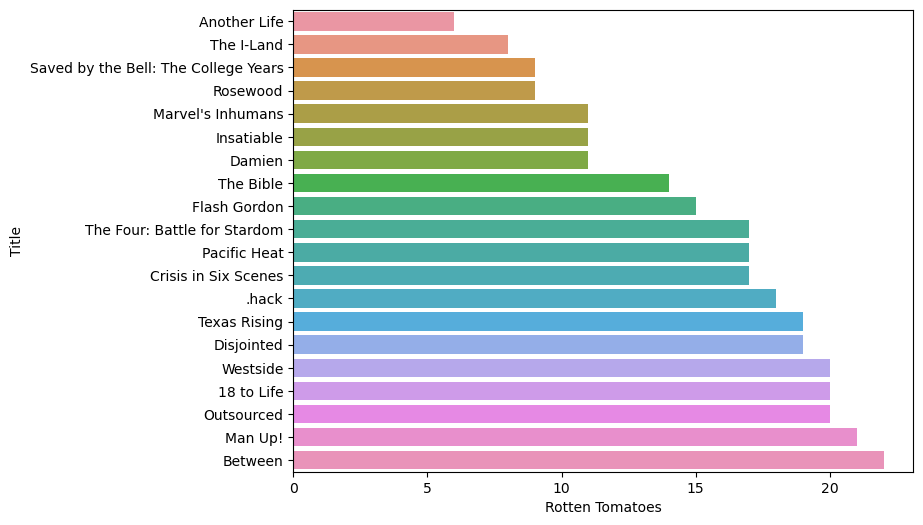

In [60]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="Rotten Tomatoes", y="Title" , data= data.sort_values("Rotten Tomatoes",ascending=True).head(20))

In [62]:
#Now, let us see the distribution of the scores.

Text(0.5, 1.0, 'Rotten Tomatoes Score Distribution')

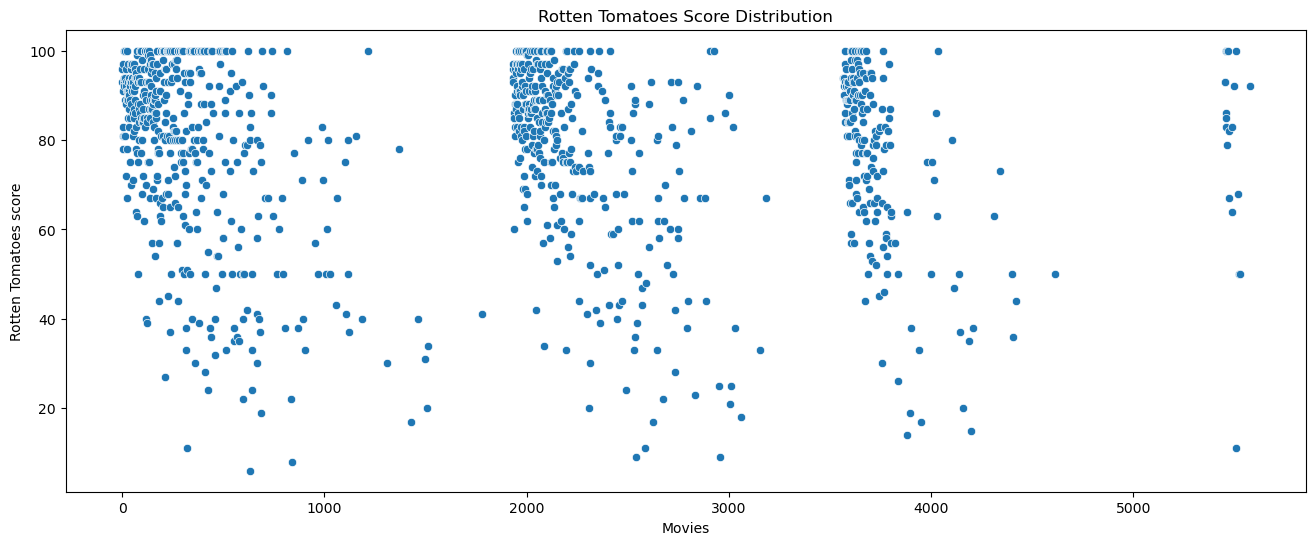

In [63]:
#Overall data of Rotten Tomatoes scores
plt.figure(figsize=(16, 6))
sns.scatterplot(data=data['Rotten Tomatoes'])
plt.ylabel("Rotten Tomatoes score")
plt.xlabel('Movies')
plt.title("Rotten Tomatoes Score Distribution")


# TV Show Clustering based on ratings
Now, we shall cluster the TV shows based on the IMDB rating and Rotten Tomatoes score. First, we start by taking the data

In [64]:
#Taking the relevant data
ratings=data[["Title",'IMDb',"Rotten Tomatoes"]]
ratings.head()

,Title,IMDb,Rotten Tomatoes
0,Breaking Bad,9.5,96.0
1,Stranger Things,8.8,93.0
2,Money Heist,8.4,91.0
3,Sherlock,9.1,78.0
4,Better Call Saul,8.7,97.0


In [67]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5611 non-null   object 
 1   IMDb             4450 non-null   float64
 2   Rotten Tomatoes  1011 non-null   float64
dtypes: float64(2), object(1)
memory usage: 131.6+ KB


# We see that there are much data that is missing. But for undergoing the process, we need complete data. So we shall delete the data which has missing values and only work on data that is complete.

In [68]:
#Removing the data
ratings=ratings.dropna()

# Important thing is that IMDB data is on a scale of 0-10, and Rotten Tomatoes data is on a scale of 0-100. But data on different scales might not lead to proper clustering, so we convert the IMDb data into a scale of 0-100, that is, we shall multiply it by 10.

In [69]:
ratings["IMDb"]=ratings["IMDb"]*10

In [70]:
#New data
ratings.head()

,Title,IMDb,Rotten Tomatoes
0,Breaking Bad,95.0,96.0
1,Stranger Things,88.0,93.0
2,Money Heist,84.0,91.0
3,Sherlock,91.0,78.0
4,Better Call Saul,87.0,97.0


# Let us now proceed with clustering, by taking the input data.

In [71]:
#Input data
X=ratings[["IMDb","Rotten Tomatoes"]]

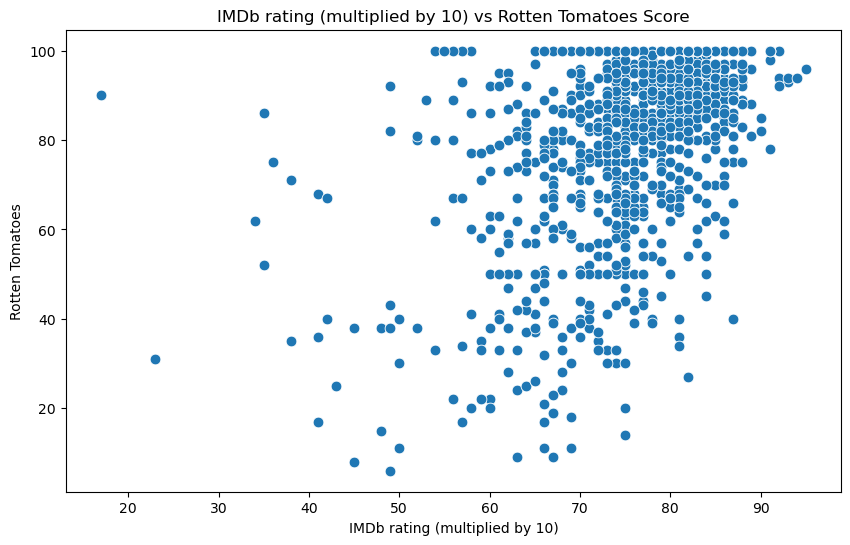

In [72]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'IMDb',y = 'Rotten Tomatoes',  data = X  ,s = 60 )
plt.xlabel('IMDb rating (multiplied by 10)')
plt.ylabel('Rotten Tomatoes') 
plt.title('IMDb rating (multiplied by 10) vs Rotten Tomatoes Score')
plt.show()

# KMeans is one of the simple but popular unsupervised learning algorithms. Here K indicates the number of clusters or classes the algorithm has to divide the data into. First, when starting, the algorithm selects random centroids. These centroids are used as the beginning points for every cluster. The positions of the centroids are determined by repeated calculations.

In [74]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

# Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k. Next, we choose the k for which WSS first starts to diminish.

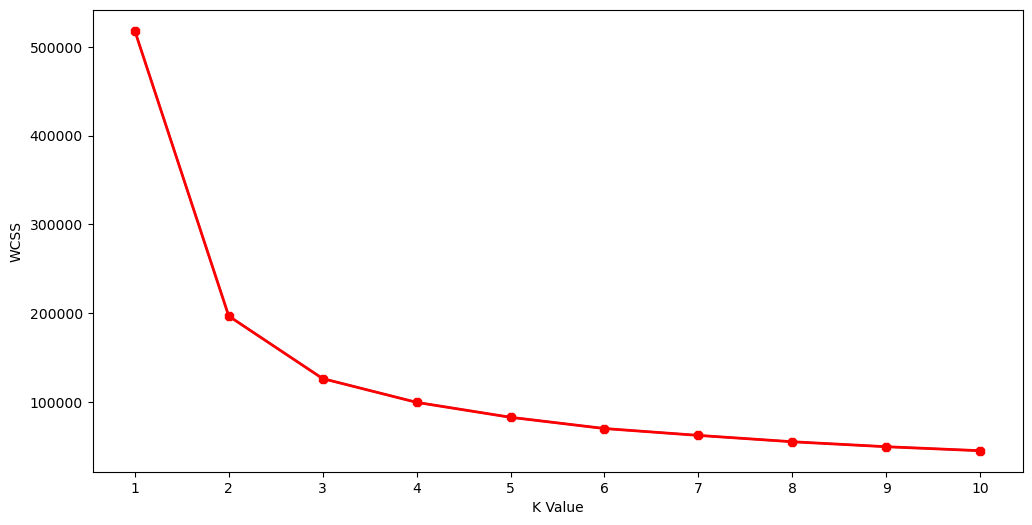

In [76]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

# This is known as the elbow graph, the x-axis being the number of clusters, the number of clusters is taken at the elbow joint point. This point is the point where making clusters is most relevant.

In [77]:
#Taking 4 clusters
km=KMeans(n_clusters=4)
#Fitting the input data
km.fit(X)
#predicting the labels of the input data
y=km.predict(X)
#adding the labels to a column named label
ratings["label"] = y

In [78]:
#Now, let us look at how the clusters look like.

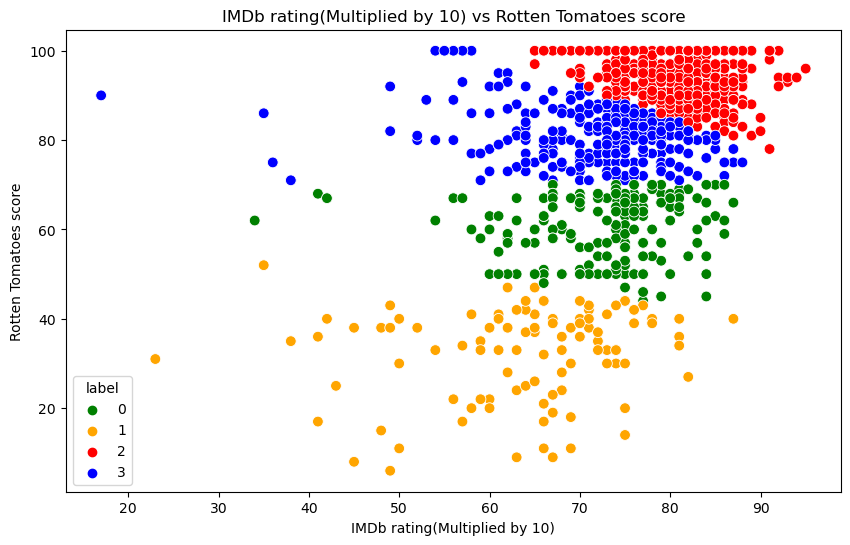

In [79]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'IMDb',y = 'Rotten Tomatoes',hue="label",  
                 palette=['green','orange','red',"blue"], legend='full',data = ratings  ,s = 60 )
plt.xlabel('IMDb rating(Multiplied by 10)')
plt.ylabel('Rotten Tomatoes score') 
plt.title('IMDb rating(Multiplied by 10) vs Rotten Tomatoes score')
plt.show()

# Analysis
The cluster at the top is surely the best TV Shows, they have high scores by both IMDb and Rotten Tomatoes.
The middle two are good and average TV Shows. There are outliers, and in some cases, some TV Shows have been rated high by one but rated low by the other.
The outliers are mainly caused by the fact that say IMDb rated them well, but Rotten Tomatoes rated them badly.
The bottom cluster is usually the TV Shows with bad ratings by both, but there are some outliers.

# thank you